# Storm Maker Sound Playground
### by Piyush Garg and Anna Nesbitt
#### Adapted from the Open Colab Notebook: <a href="https://colab.research.google.com/drive/1--xY78_ZTFwpI7F2ZfaeyFKiAOG2nkwd#scrollTo=tB1s7xjOt2eI&forceEdit=true&sandboxMode=true">Test Audio</a>, by Vicente Jimenez.

We can create and play with audio data using **Google Colaboratory**

In this example we will use three python packages:

* **numpy** to manipulate the audio data

* **scipy.io.wavfile** to load .wav files

* **IPython.display** to play the audio data

Let's import those packages now ...

In [1]:
# Needed imports
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
!pip install wavio
import wavio

In [0]:
%%html
<iframe width="560" 
        height="315" 
        src="https://www.youtube-nocookie.com/embed/XLfQpv2ZRPU?rel=0" 
        frameborder="0" 
        allow="encrypted-media" 
        allowfullscreen>
</iframe>

<!-- A longer tutorial From Khan Academy: https://www.khanacademy.org/science/ap-physics-1/ap-mechanical-waves-and-sound/introduction-to-sound-waves-ap/v/sound-properties-amplitude-period-frequency-wavelength -->

We can create a sound wave using **mathematics** and the **numpy** package from the Python coding language.



In [0]:
# Create a sound
multiplier = 5 #(Try changing this number from 0.1 to 9)
framerate = 44100  # in Hz, Framerate is samples per second. This is a very common sampling rate.
t = np.linspace(0,5,framerate*multiplier)
sound_1 = np.cos(2*np.pi*220*t) + np.cos(2*np.pi*224*t)

It could also be shown using direct calls the **matplotlib** module

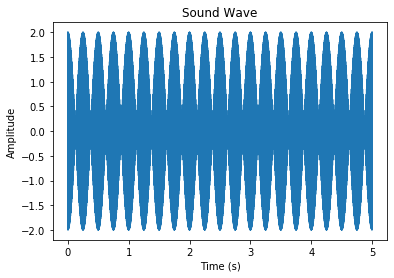

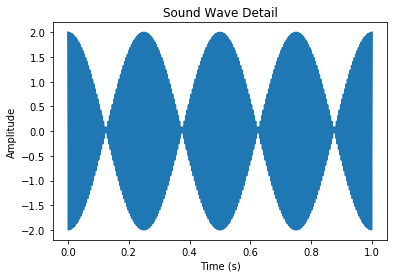

In [3]:
import matplotlib.pyplot as plt

# Show the sound wave
fig, ax = plt.subplots()
ax.plot(t, sound_1)
ax.set(xlabel='Time (s)', ylabel='Amplitude',
       title='Sound Wave')
plt.show()


# We look at the first second
fig, ax = plt.subplots()
tim = np.where(t < 1)
ax.plot(t[tim], sound_1[tim])
ax.set(xlabel='Time (s)', ylabel='Amplitude',
       title='Sound Wave Detail')
plt.show()


The following code plays the sound **data** in **mono**

In [4]:
# Generate a player for mono sound
Audio(sound_1,rate=framerate)

Sound can be played **automatically** after the cell code ends by using the **autoplay** parameter

This is shown on the following example

In [5]:
# Take a 1 second piece of the mono sound
sound_2 = sound_1[0:framerate]

# Generate a player for mono sound
Audio(sound_2,rate=framerate,autoplay=True)

Audio data can also be generated in **stereo**

We will first generate and show the waveforms

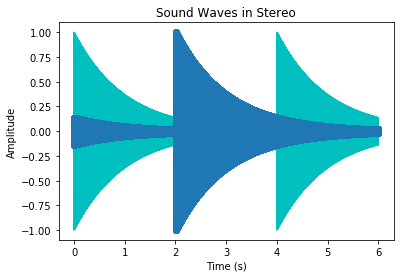

[ 0.00000000e+00  3.76039050e-02  7.51525693e-02 ... -1.01719013e-02
 -5.08941210e-03  8.49382349e-15]


In [6]:
import matplotlib.pyplot as plt
# Base sound
def base(t):
    return np.sin(2*np.pi*220*t)*np.exp(-t)

multiplier = 5
framerate = 44100
t = np.linspace(0,6,framerate*multiplier)

tLeft  = 4*(t/4 - np.fix(t/4))
left   = base(tLeft)

tRight = 4*((t+2)/4 - np.fix((t+2)/4))
right  = base(tRight)

# Show stero sound wave
fig, ax = plt.subplots()
ax.plot(t, left, 'c', t, right, 'o')
ax.set(xlabel='Time (s)', ylabel='Amplitude',
       title='Sound Waves in Stereo')
plt.show()

print(left)

Now we can play the sound data in **stereo**

In [7]:
# Can also do stereo or more channels
Audio([left, right],rate=framerate)

Sound data can also be loaded from **wav** files!


In [8]:
# Load sound file from GitHub
# See a full list of files here: https://github.com/aenesbitt/stormmaker/tree/master/weather_sounds

!wget https://github.com/aenesbitt/stormmaker/raw/master/weather_sounds/hurricane-01.wav
!wget https://github.com/aenesbitt/stormmaker/raw/master/weather_sounds/hail-storm-01.wav
!wget https://github.com/aenesbitt/stormmaker/raw/master/weather_sounds/thunder-01.wav

# Erase output after import
from IPython.display import clear_output
clear_output()

--2019-12-12 21:27:31--  https://github.com/aenesbitt/stormmaker/raw/master/weather_sounds/hurricane-01.wav
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aenesbitt/stormmaker/master/weather_sounds/hurricane-01.wav [following]
--2019-12-12 21:27:31--  https://raw.githubusercontent.com/aenesbitt/stormmaker/master/weather_sounds/hurricane-01.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1550286 (1.5M) [audio/wav]
Saving to: ‘hurricane-01.wav’

hurricane-01.wav    100%[===================>]   1.48M  --.-KB/s    in 0.04s   

2019-12-12 21:27:32 (41.7 MB/s) - ‘hurricane-01.wav’ saved [1550286/15502

Once the file is saved in the **virtual machine**, it can be read on a numpy array and decoded as sound information

In [20]:
# Load the file on an object

data_1 = wavio.read('hurricane-01.wav')
data_2 = wavio.read('hail-storm-01.wav')
data_3 = wavio.read('thunder-01.wav')

# Separete the object elements
framerate_1 = data_1.rate
sounddata_1 = data_1.data
time_1      = np.arange(0,len(sounddata_1))/framerate_1

framerate_2 = data_2.rate
sounddata_2 = data_2.data
framerate_3 = data_3.rate
sounddata_3 = data_3.data
 

# Show information about the object
print('Sample rate:',framerate_1,'Hz')
print('Total time:',len(sounddata_1)/framerate_1,'s')

Sample rate: 44100 Hz
Total time: 8.788027210884353 s


The loaded sound data can be shown on a graph, if needed
https://github.com/R6500/Python-bits/blob/master/Colaboratory/Sounds/Bicycle%20bell%203.wav?raw=true

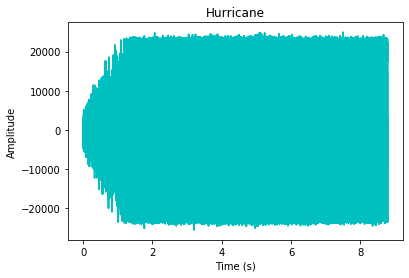

In [11]:
#Show the sound data
fig, ax = plt.subplots()
ax.plot(time_1, sounddata_1, 'c')
ax.set(xlabel='Time (s)', ylabel='Amplitude',
       title='Hurricane')
plt.show()

And, of course, it can be played

In [12]:
# Generate a player for mono sound
# If the below command doesn't work try Audio(sounddata,rate=framerate)
# num_channels and num_samples may be reversed
Audio(sounddata_1.T,rate=framerate_1)

In [13]:
# You can load a few sounds, stack up the data, and make your own storm!
data = np.vstack([sounddata_1, sounddata_2])

#np.shape(sounddata_2)
Audio(data.T,rate=framerate_2)

Output hidden; open in https://colab.research.google.com to view.